# Práctica 1: Reconocimiento de dígitos manuscritos con extracción manual de características

El nuevo banco "First bank of Wiki" desea implementar un sistema de reconocimiento automático de cheques como el siguiente:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)


Actualmente, el banco cuenta con un sistema capaz de aislar los dígitos y convertirlos en imágenes de 8 x 8, pero no de reconocer de qué dígito se trata. Por esa razón, nos ha solicitado realizar un módulo capaz de reconocer dígitos manuscritos dada una imagen de 8 x 8 pixeles:


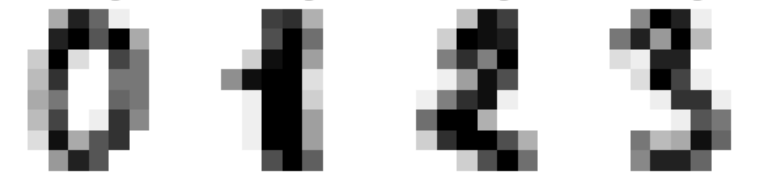



# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

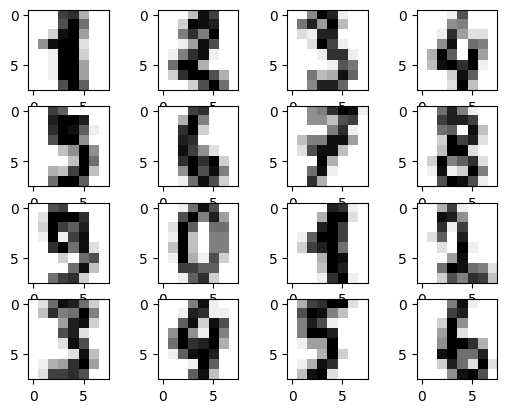

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

for i in range(1,17):
    
    plt.subplot(4,4,i)
    
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))

# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [3]:
# Cargo los dígitos
X, y = digits.images, digits.target

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total de datos para clasificación entre 10 dígitos: {y.shape[0]}")

values, counts = np.unique(y_train, return_counts=True)
print(f"Datos de entrenamiento: {y_train.shape[0]}")
print(f"Datos de test: {y_test.shape[0]}")
print("Distribución de clases en el conjunto de entrenamiento:")
for value, count in zip(values, counts):
    print(f"  - {value}: {count} muestras")

Total de datos para clasificación entre 10 dígitos: 1797
Datos de entrenamiento: 1347
Datos de test: 450
Distribución de clases en el conjunto de entrenamiento:
  - 0: 135 muestras
  - 1: 145 muestras
  - 2: 139 muestras
  - 3: 137 muestras
  - 4: 126 muestras
  - 5: 123 muestras
  - 6: 136 muestras
  - 7: 138 muestras
  - 8: 136 muestras
  - 9: 132 muestras


In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (1347, 64)
Dimensiones de X_test: (450, 64)


In [5]:
from sklearn.neural_network import MLPClassifier

# Definimos un pereceptrón
clasificador = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenamos el clasificador
clasificador.fit(X_train, y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_test, y_test)))

# Imprimir las predicciones realizadas para los datos de test
print("Predictions: " + str(clasificador.predict(X_test)))

Accuracy en test: 0.9711111111111111
Predictions: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 2 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 2 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 3 8 5 5 1 0 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


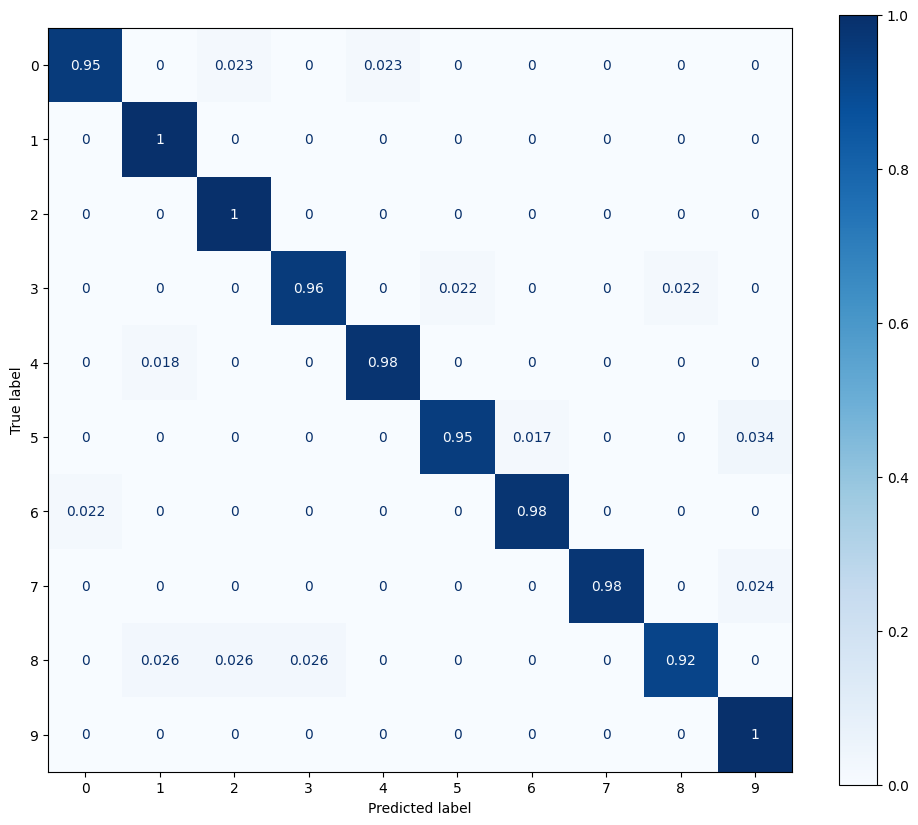

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, clasificador.predict(X_test), normalize='true')

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues,ax=ax)

plt.show()

In [7]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Calcular métricas de evaluación
recall = recall_score(y_test, clasificador.predict(X_test), average='weighted')
precision = precision_score(y_test, clasificador.predict(X_test), average='weighted')
f1 = f1_score(y_test, clasificador.predict(X_test), average='weighted')

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, clasificador.predict(X_test), target_names=digits.target_names.astype(str)))

Recall: 0.97
Precision: 0.97
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.95      1.00      0.97        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       0.98      0.98      0.98        55
           5       0.98      0.95      0.97        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.97      0.92      0.95        38
           9       0.94      1.00      0.97        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



# Entregable:

Emplear redes neuronales para la predicción de los tipos de cobertura para los datos de la zona del dique Roggero.

 1. Realizar un análisis exploratorio de los datos, y estandarizar/normalizar las variables en caso de ser necesario.
 2. Diseñar al menos 3 arquitecturas diferentes de redes con complejidades apreciablemente diferentes.
 3. Comparar los resultados (i.e. comparar las métricas accuracy, f1_score, recall, precision) con los obtenidos empleando los 3 métodos aprendidos en la clase de aprendizaje supervisado.

In [8]:
import numpy as np
import pandas as pd

import geopandas as gpd
import rasterio

from rasterio.plot import show
from rasterio.mask import mask

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

from funciones import *

C:\Python39\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 3 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


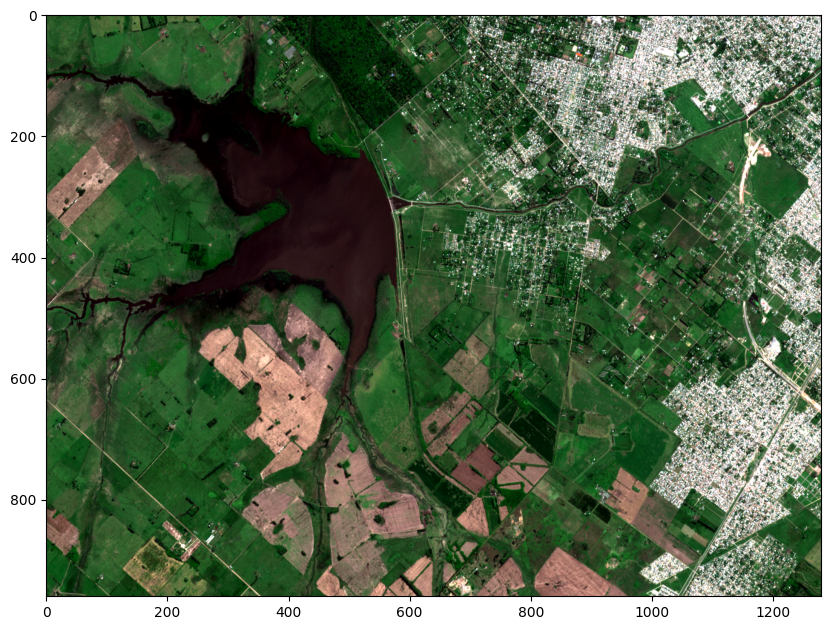

{'agua': 0, 'bosque': 1, 'humedal': 2, 'rural_cultivo': 3, 'rural_sd': 4, 'urbano': 5}
(0, 5)
(0,)
Valor de la clase para el elemento 0: humedal
Valor de la clase para el elemento 1: agua
Valor de la clase para el elemento 2: bosque
Valor de la clase para el elemento 3: urbano
Valor de la clase para el elemento 4: rural_cultivo
Valor de la clase para el elemento 5: rural_cultivo
Valor de la clase para el elemento 6: urbano
Valor de la clase para el elemento 7: humedal
Valor de la clase para el elemento 8: humedal
Valor de la clase para el elemento 9: humedal
Valor de la clase para el elemento 10: humedal
Valor de la clase para el elemento 11: rural_sd
Valor de la clase para el elemento 12: rural_sd
Valor de la clase para el elemento 13: rural_cultivo
Valor de la clase para el elemento 14: bosque
Valor de la clase para el elemento 15: bosque
Valor de la clase para el elemento 16: rural_sd
Valor de la clase para el elemento 17: humedal
Valor de la clase para el elemento 18: rural_sd
Valo

In [9]:
path_proc = './proc/'
path_out = './out/'
path_shp = './raw_data/vector/'
raster_fn = path_proc + 'S2_dique_20181006.tif'
rois_shp = gpd.read_file(path_shp+'rois_dique3.geojson')

#Leo los ROIS
with rasterio.open(raster_fn) as src:
    d=src.count #cantidad de atributos = cantidad de bandas en el raster
    m=src.read()

nodata=-255 #elijo un valor raro para nodata

plt.figure(figsize=(10,10))
show(nequalize(m)[[2,1,0]])
plt.show()

clases=list(set(rois_shp['clase']))
clases.sort() #numero las clases de los ROIs alfabéticamente
clase_dict = {clase:i for i, clase in enumerate(clases)}

print(clase_dict)

#Preparo colección de atributos etiquetados. Comienza con 0 datos
X = np.zeros([0,d],dtype = np.float32) #array con todos los atributos
Y = np.zeros([0],dtype=int)            #array con sus etiquetas

print(X.shape)
print(Y.shape)

for index, row in rois_shp.iterrows():
    print(f'Valor de la clase para el elemento {index}:', row['clase'])

with rasterio.open(raster_fn) as src:
    for index, row in rois_shp.iterrows():
        poli = row['geometry']
        clase = row['clase']
        #Realizo la máscara usando poli como geometria
        clip, _transform = mask(src, [poli], crop=True,nodata=nodata)
        #Calculo las dimensiones del recorte (d siempre va a ser igual, numero de bandas)
        d,x,y = clip.shape
        # Reacomodo todo como si fuera una tabla (reshape), y con .T lo traspongo. Eso me da la 
        #misma estructura de X
        D = list(clip.reshape([d,x*y]).T)
        #Con esta línea me aseguro de eliminar cualquier valor NoData producto del enmascarado. Usamos .prod() para
        # garantizar que en nunguna dimensión (banda) haya quedado un valor sin datos
        D = [p for p in D if (not (p==nodata).prod())]
        # Convierto a la tabla/lista D en array
        DX = np.array(D)
        #Genero la lista de etiquetas (número) que corresponden a esta clase (lo saco del diccionario definido previamente)
        DY = np.repeat(clase_dict[clase],len(D))
        #a X le concateno DX
        X = np.concatenate((X,DX))
        #a Y le concateno DY
        Y = np.concatenate((Y,DY))


print(X.shape)
print(Y.shape)

L = list(Y)
E = set(L) #set devuelve valores únicos

print(f'valores únicos de clases (números): {E}')
  
pixels_por_clase = {clases[y]:L.count(y) for y in E}

for clase in clases:
    print(f"{clase:>15s}: {pixels_por_clase[clase]}")


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42) # 75% para train y 25% para test

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}


mlp = MLPClassifier(max_iter=1000, random_state=42)

grid = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, Y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 25),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']},
             scoring='accuracy', verbose=2)

# Mejores resultados

Ahora se ordena en forma decreciente los resultados, para ver que combinaciones de hiperparámetros en el Perceptrón Multicapa son las que obtuvieron la mejor performance

In [16]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# Convertimos los resultados a un DataFrame
results = pd.DataFrame(grid.cv_results_)

# Ordenamos por la mejor puntuación media (descendente)
top_results = results.sort_values(by="mean_test_score", ascending=False)

# Mostramos las 3 mejores combinaciones
top_3 = top_results[['mean_test_score', 'mean_fit_time', 'std_test_score', 'params']].head(3)
print(top_3)

    mean_test_score  mean_fit_time  std_test_score  \
6          0.947646      28.369002        0.003234   
7          0.947646      28.054532        0.003234   
22         0.946408      33.739808        0.002925   

                                                                                                                    params  
6   {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}  
7   {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}  
22  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}  


In [17]:
# Mostrar mejor combinación de hiperparámetros
print("\nMejores hiperparámetros encontrados:")
print(grid.best_params_)


Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


# Ahora se usará la mejor combinación de red encontrada

Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

In [19]:
best_model = grid.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

In [20]:
print("\n=== Resultados en Test ===")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("F1-score:", f1_score(Y_test, Y_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))
print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))

print("\nReporte de clasificación:")
print(classification_report(Y_test, Y_pred))


=== Resultados en Test ===
Accuracy: 0.9497088791848617
F1-score: 0.9507596484689328
Recall: 0.9497088791848617
Precision: 0.9530619937779092

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       0.96      0.95      0.95      3063
           2       0.76      0.87      0.81      1666
           3       0.96      0.90      0.93      2776
           4       1.00      1.00      1.00      1978
           5       1.00      0.99      0.99      1325

    accuracy                           0.95     13740
   macro avg       0.95      0.95      0.95     13740
weighted avg       0.95      0.95      0.95     13740



# Se emplean modelos supervisados vistos en la clase 7

In [21]:
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Importación de funciones propias

from funciones import *

# Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score as kappa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definición de modelos y sus grids
modelos = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [5, 10, 20, None],
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20, None],
            'criterion': ['gini', 'entropy']
        }
    },
    'kNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}

# Ejecutar GridSearchCV para cada modelo
resultados = {}

for nombre, config in modelos.items():
    grid = GridSearchCV(config['model'], config['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
    
    if nombre == 'kNN':
        grid.fit(X_train_scaled, Y_train)
        Y_pred = grid.predict(X_test_scaled)
    else:
        grid.fit(X_train, Y_train)
        Y_pred = grid.predict(X_test)

    resultados[nombre] = {
        'Mejores parámetros': grid.best_params_,
        'Mejor accuracy en CV': grid.best_score_,
        'Accuracy en test': grid.score(X_test_scaled if nombre == 'kNN' else X_test, Y_test),
        'Reporte de clasificación': classification_report(Y_test, Y_pred)
    }

# Mostrar resultados
for nombre, res in resultados.items():
    print(f"\n===== Modelo: {nombre} =====")
    print("Mejores parámetros:", res['Mejores parámetros'])
    print("Mejor accuracy en CV:", res['Mejor accuracy en CV'])
    print("Accuracy en test:", res['Accuracy en test'])
    print("Reporte de clasificación:\n", res['Reporte de clasificación'])



===== Modelo: DecisionTree =====
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10}
Mejor accuracy en CV: 0.9378199331407477
Accuracy en test: 0.9398835516739447
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       0.94      0.95      0.95      3063
           2       0.76      0.79      0.78      1666
           3       0.93      0.90      0.92      2776
           4       0.99      0.99      0.99      1978
           5       0.99      0.97      0.98      1325

    accuracy                           0.94     13740
   macro avg       0.93      0.93      0.93     13740
weighted avg       0.94      0.94      0.94     13740


===== Modelo: RandomForest =====
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
Mejor accuracy en CV: 0.9448554911661626
Accuracy en test: 0.9466521106259097
Reporte de clasificación:
               precision    recall 

# Conclusión

El Perceptrón Multicapa (MLP) supera a los modelos clásicos como Decision Trees, Random Forests y k-NN cuando:

Se concluye que MLP, gracias a sus múltiples capas ocultas y funciones de activación no lineales, puede modelar funciones complejas que los árboles o k-NN no pueden aproximar bien. Además, a diferencia de los árboles que dividen el espacio con reglas rígidas o k-NN que depende de distancias, el MLP aprende representaciones internas que capturan patrones distribuidos y generaliza mejor cuando hay ruido.